# Why do we regress?
In short, we want to predict the future values of things or describe an existing dataset with a simple and concise model.

Some typical examples:  
(1) Trying to predict the price of a stock  
(2) Predictin the selling price of a home  
(3) Really anything, whether or not a regression model will have acceptable accuracy is another thing though - which I will touch on during this post

# Section (2) - Simple Linear Regression and Multiple Linear Regression
So, what's a common way we make predictions? One way, is to identify other measurable elements that we think, given we know their values can help us predict our desired variable's (or sometimes known as response variables) next value. And once we have accumulated this list of measurable elements (we will refer to them as 'predictor variables' later on) we then look at the historical relationship between this list of elements and our desired variable and assume the next value will generally follow this historical pattern.

## Simple Linear Regression
Let's just start with the simplest of linear regression. So if we had a dataset like:

In [2]:
import matplotlib.pyplot as plt

# Where we just assume Y to be height of a tree in feet and X to be age in years

y = [1,4, 5, 7, 10, 11, 14]
x = [1,2,3,4,5,6,7]
fig, ax = plt.subplots()
ax.scatter(x,y, c='green')
ax.set_xlabel("Age (Years)")
ax.set_ylabel("Height (Feet)")
plt.show()


Under a simple linear regression. We only have two variables that we can control when creating our model. An intercept term ($\beta_0$) and a slope term ($\beta_1$). As you noticed, either visually, or by the two terms that we can tweak, the simple linear regression is just picking a line in a 2-D plot (like above) that best 'fits' (we'll talk about how we measure 'fit' later on) a dataset.

Here is the same dataset but now with a few possible lines that we could use to best describe this data.

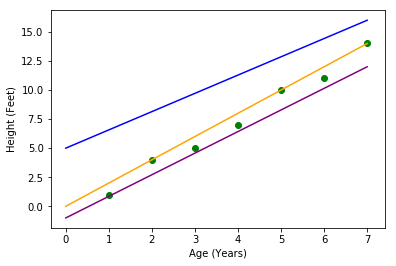

In [3]:
#NOTE: there must be a better way to do this. I want to refer to the previous code block's axes object and then just
# add some lines to it and then refresh it in this code block.
fig, ax2 = plt.subplots() 
ax2.plot([0,7], [0, 14], c='orange')
ax2.plot([0,7], [5, 16], c='blue')
ax2.plot([0,7], [-1, 12], c='purple')
ax2.set_xlabel("Age (Years)")
ax2.set_ylabel("Height (Feet)")
ax2.scatter(x,y, c='green')
plt.show()

Now are these good lines? Can we say one of the lines describes the dataset better than the other? We'll come back and address these questions in the next sub-section.

But for now, let's just think about how one might interpret these lines and why these lines might be useful to us. A couple of scenarios:  
(1) Friends are making bets on how tall the tree will be after year 8,9,10, and they are wondering how to predict that height and what a reasonable estimate might be  
(2) Another baby tree is planted and people would like to make a prediction of how tall it'll be after year 1, 2 etc..  
  
So, how could these lines help use with either of these scenarios? The two side-by-side plots below can help you visualize what these lines are trying to do:

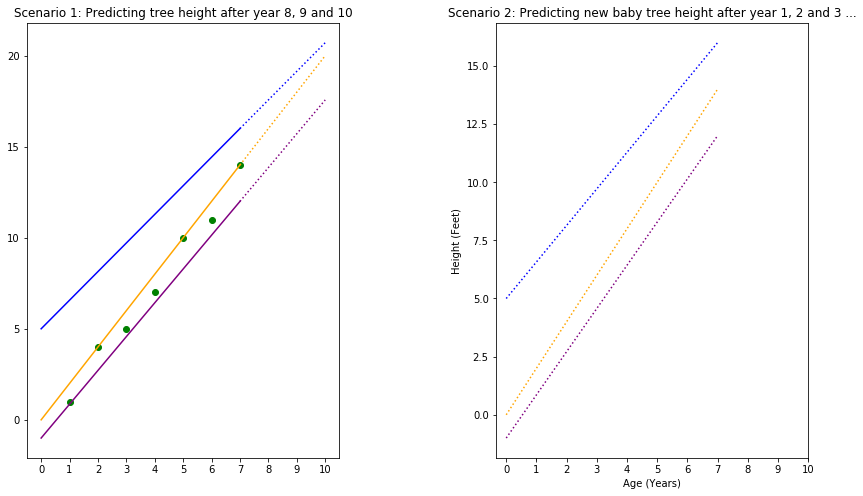

In [4]:
#NOTE: there must be a better way to do this. I want to refer to the previous code block's axes object and then just
# add some lines to it and then refresh it in this code block.
import matplotlib.ticker as ticker
tick_spacing = 1

fig, (ax, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(wspace=.5)
fig.set_size_inches(14,8)
ax.set_title("Scenario 1: Predicting tree height after year 8, 9 and 10")

ax.plot([0,7], [0, 14], c='orange') # slope = 2, intercept = 0 
ax.plot([0,7], [5, 16], c='blue') # slope = 11 / 7, intercept = 5
ax.plot([0,7], [-1, 12], c='purple') # slope = 13 / 7, intercept = -1
# predicted values, by just extending the existing orange line. I calculated the y values below by using the slope and
# intercept values shown above
ax.plot([7,10], [14, 20], c='orange', linestyle=':') 
ax.plot([7,10], [16, 20.714], c='blue', linestyle=':')
ax.plot([7,10], [12, 17.571], c='purple', linestyle=':')
ax.scatter(x,y, c='green')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

ax2.set_ylabel("Height (Feet)")
ax2.set_title("Scenario 2: Predicting new baby tree height after year 1, 2 and 3 ...")
ax2.plot([0,7], [0, 14], c='orange', linestyle=":")
ax2.plot([0,7], [5, 16], c='blue', linestyle=":")
ax2.plot([0,7], [-1, 12], c='purple', linestyle=":")
ax2.set_xlabel("Age (Years)")
ax2.xaxis.set_ticks([1,10],1)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))


plt.show()

_NOTE_: Lines that are dashed can be thought of as predicted values for the tree. (i.e on the left hand side the dashed part of each line can be thought of 'the future' years that we don't have data for and are trying to predict. On the right hand side, all lines are completed dashed because the tree is a sproutling and thus it has its whole future in front of it and all height values are a prediction.

So in words, and keeping things super simple (hence Simple Linear Regression) let's just ignore all other variables that could determine tree height and only use its age and return to the 2 scenarios:   
  
**(1) Predicting 7 year old tree's height in year 8, 9, and 10.**  
&nbsp;&nbsp;&nbsp;&nbsp;(a) Blue line - if we believe the blue line is a good description of the actual data, then using this line we'd predict that in year 8, 9 and 10 the tree's height would be 17.57, 19.14 and 20.71, respectively. (note calculated values by plugging in 8,9 and 10 into the slope-intercept line equation in the comments above)  
&nbsp;&nbsp;&nbsp;&nbsp;(b) Orange line - if we use the orange line, then we'd predict that in year 8, 9 and 10 the tree's height would be 16, 18 and 20, respectively.  
&nbsp;&nbsp;&nbsp;&nbsp;(c) Purple line - we'd predict that in year 8, 9 and 10 the tree's height would be 13.86, 15.71 and 17.57, respectively.    
Therefore, if were were betting on this tree's height at year 8, 9 , 10. We could look at these 3 lines and decide which one we like the best and use the predicted values listed above as our predictions.  
**(2) Predicting new baby tree's height** - We would use the same logic as scenario 1, and whatever line we feel is the 'best', choose that one as our predicting line.  

**Summary of this section**: Regression can help us model data and predict future data, simple linear regression is a subset of regression where we have a line, and try to fit this line to the data and use it as a model of historical data and sometimes a guide to use when predicting future data. One can come up with many (infinitely many) lines but how do we choose what is the 'best', given our data, and what metric do we use to determine what is 'best'?

# Section (3) - How do we choose which line to choose? ADD brief think of test of statistical significance
The above example only showed three possible lines, in theory we could randomly generate A LOT of lines and we could probably eyeball a subset of them that look the 'best', but how do we definitively pick the BEST one in a systematic consistent manner?  

**How do we rank all these possible lines?**  
There needs to be a consistent metric and the metric we will use for our simple linear regression and be a critical part of evaluating the models mentioned later on in this post is called 'squared error' or 'residual sum of squares' (RSS).  

**Squared Error / RSS**  
Now there are a lot of reasons exactly why we use this error metric (DO I GO INTO THAT HERE / DO I EVEN KNOW WHY?). For now we'll leave out the why's. What is RSS? 

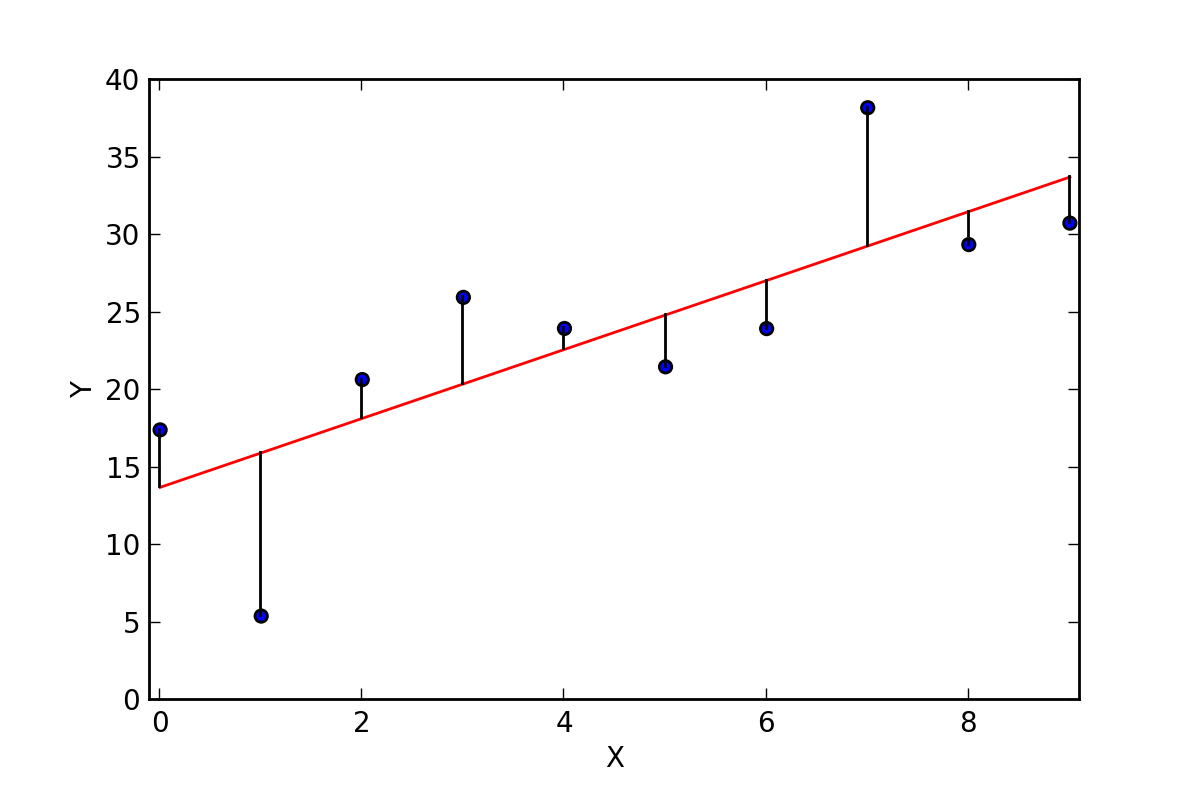

Most people have probably seen an image like the above before. If not, what you're looking at this is a scatterplot of data and the line is an example of a simple linear regression. The vertical lines connecting the datapoints and the line, is the difference between, at some specific x-value, in 'y-values' of that data point and the line's y-value.  

RSS is just the square of each of these distances, summed all together. (AGAIN WHY IT'S SQUARED - GO INTO OR NOT OR JUST LEAVE BE?). What this looks like in math:  

RSS = $\sum_{i=1}^n (y_i - \hat{y}_i)^2$   
such that (s.t.) $y_i$ = the actual y-value for datapoint 'i', and $\hat{y}_i$ = the regression line's estimated y-value for that datapoint 'i'.  

Let's now see this on our tree example. Where each plot now just shows one of the three (blue, orange and purple) lines and their respective residual errors:  


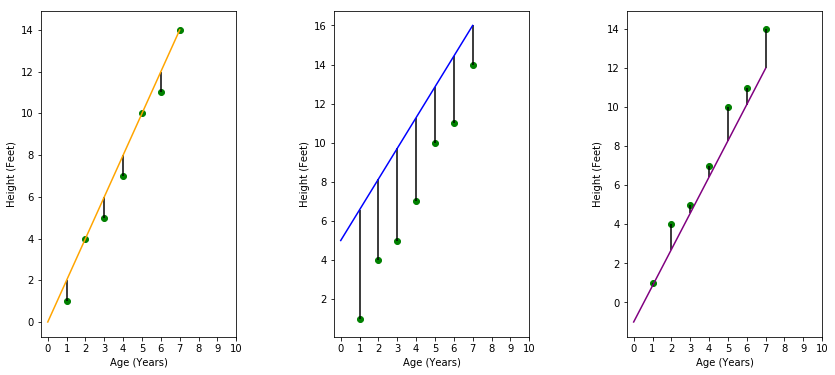

Above black lines denote the residuals or residual errors at each data point. \      Longer vertical lines are greater errors and thus a more inaccurate line estimate.

RSS for  Orange  line:  4
RSS for  Blue  line:  112.71
RSS for  Purple  line:  9.86


In [25]:
#NOTE: there must be a better way to do this. I want to refer to the previous code block's axes object and then just
# add some lines to it and then refresh it in this code block.
fig, (ax, ax2, ax3) = plt.subplots(1,3) 
#plot the lines
ax.plot([0,7], [0, 14], c='orange')
ax2.plot([0,7], [5, 16], c='blue')
ax3.plot([0,7], [-1, 12], c='purple')
# plot the same datapoints on each graph
ax.scatter(x,y, c='green')
ax2.scatter(x,y, c='green')
ax3.scatter(x,y, c='green')
# plot the residual lines. The below 'estimate' lists are just the estimates based on each colored line. 
orange_estimates = [2 * x_i + 0 for x_i in x]
blue_estimates = [11/7 * x_i + 5 for x_i in x]
purple_estimates = [13/7 * x_i -1 for x_i in x]
# getting the residuals. S.t. residual = y_estimate - y_true
orange_residual = [y_hat - y_true for y_hat, y_true in zip(orange_estimates, y)]
blue_residual = [y_hat - y_true for y_hat, y_true in zip(blue_estimates, y)]
purple_residual = [y_hat - y_true for y_hat, y_true in zip(purple_estimates, y)]
# plotting the residual lines
ax.vlines(x, [min(y, y+res) for y, res in zip(y, orange_residual)], [max(y, y+res) for y, res in zip(y, orange_residual)])
ax2.vlines(x, [min(y, y+res) for y, res in zip(y, blue_residual)], [max(y, y+res) for y, res in zip(y, blue_residual)])
ax3.vlines(x, [min(y, y+res) for y, res in zip(y, purple_residual)], [max(y, y+res) for y, res in zip(y, purple_residual)])
#setting ticks and other labelling for each axis
fig.subplots_adjust(wspace=.5)
fig.set_size_inches(14,6)
for axis in (ax, ax2, ax3):
    axis.xaxis.set_ticks([1,10],1)
    axis.xaxis.set_ticks([1,10],1)
    axis.xaxis.set_ticks([1,10],1)
    axis.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    axis.set_xlabel("Age (Years)")
    axis.set_ylabel("Height (Feet)")

plt.show()
labels = ("Orange", "Blue", "Purple")
print("Above black lines denote the residuals or residual errors at each data point. \\
      Longer vertical lines are greater errors and thus a more inaccurate line estimate.\n")
for count, residuals in enumerate((orange_residual, blue_residual, purple_residual)):
    print("RSS for ", labels[count], " line: ", round(sum([pow(res, 2) for res in residuals]), 2))

Therefore, just using the RSS as a metric for which line is best and only considering these 3 lines, We can see that the orange line is the winner as its RSS is the least out of all 3. So, what this would mean is that for predicting this tree's height in year 8, 9, 10 or even predicting a new baby tree's height in its first 7 years of life, we would probably want to pick the orange line rather than either the blue or purple lines.  

Instead of just picking random lines and calculating each corresponding RSS, how do we systematically find the 'best fit' line (in this example we define 'best fit' as the line with the lowest RSS value.). Let's take the equation for our orange line first (remember the orange line's intercept was 0):  

$\hat{y_i} = 2x_i$  

To make this easier let's just generalize this line and replace the slope and intercept terms of the orange line with variables $\beta_0$ and $\beta_1$ for the intercept and slope terms, respectively. Now we have:  

$\hat{y_i} = \beta_0 + \beta_1x_i$ (note: that for the orange line we would have $\beta_0$ = 0, $\beta_1$ = 2)  

Now, remember that the residual for each point is just $y_i - \hat{y}_i$. And the RSS is just the sum of the squares of each of these terms. What we can first do is replace each $\hat{y}_i$ with the formula above such that we have now:  

RSS = $\sum_{i=1}^n(y_i - \beta_0 + \beta_1x_i)^2$ (note: $\beta_0$ and $\beta_1$ are the same value for each $x_i$, whatever their value may be)  

How do we choose $\beta_0$ and $\beta_1$ values that optimize RSS to be its lowest possible value? We take the partial derivatives of RSS with respect to each variable and then solve for each of these variables:  

Let's expand RSS for every term i to make it easier:  

RSS = $\sum_{i=1}^n(y_i - \beta_0 + \beta_1x_i)^2 = \sum_{i=1}^ny_i^2 - y_i\beta_0 - y_i\beta_1x_i - \beta_0y_i + \beta_0^2 \beta_0\beta_1x_i - \beta_1x_iy_i + \beta_1x_i\beta_0 + \beta_1^2x_i^2$  

We can solve for $\beta_0$ in terms of $\beta_1$ first:

$\frac{dRSS}{d\beta_0} = \sum_{i=1}^n -y_i - y_i + 2\beta_0 + \beta_1x_i + \beta_1x_i$. Then set this to zero.  

$\sum_{i=1}^n -y_i - y_i + 2\beta_0 + \beta_1x_i + \beta_1x_i = 0$  

$\sum_{i=1}^n -2y_i + 2\beta_0 + 2\beta_1x_i = 0$  We can divide everything by 2  

$\sum_{i=1}^n -y_i + \beta_0 + \beta_1x_i = 0$ We can then seperate the summations to get. We can do this because the summation operator is linear

$\sum_{i=1}^n -y_i + \sum_{i=1}^n \beta_0 + \sum_{i=1}^n\beta_1x_i = 0$ Then divide everything by 'n'  

$-\bar{y} + \beta_0 + \beta_1\bar{x} = 0$  

$\beta_0 = \bar{y} - \beta_1\bar{x}$ We can also rearrange it to the form y = mx + b which will come in handy later  

$\bar{y} = \beta_0  + \beta_1\bar{x}$  

We can now do the samething for $\beta_1$ starting from the same expanded RSS formula.  

$\frac{dRSS}{d\beta_1} = \sum_{i=1}^n -y_ix_i +\beta_0x_i - x_iy_i + x_i\beta_0 + 2\beta_1x_i^2 $. Then set this to zero and combine like terms like before to get:    

$\sum_{i=1}^n -2y_ix_i +2\beta_0x_i + 2\beta_1x_i^2 = 0$divide by 2 and break out the summations

$\sum_{i=1}^n -y_ix_i + \sum_{i=1}^n\beta_0x_i + \sum_{i=1}^n\beta_1x_i^2 = 0$ Divide by 'n' and move things around  

$\beta_1\bar{x^2} = \bar{xy} - \beta_0\bar{x}$ We can then get it into slope-intercept form by dividing by $\bar{x}$ and moving things around.  

$\frac{\bar{xy}}{\bar{x}} = \beta_1\frac{\bar{x^2}}{\bar{x}} + \beta_0$ (hard to see but those are bars on top of each variable in the denominators). What do we have now?  

(1) $\bar{y} = \beta_0  + \beta_1\bar{x}$    
(2) $\frac{\bar{xy}}{\bar{x}} = \beta_1\frac{\bar{x^2}}{\bar{x}} + \beta_0$  

Now you can see that 2 equations and 2 unknowns. So we could use linear algebra or other techniques to solve for both betas (which we'll do later with multiple linear regression). However, we can also notice that we are just trying to find an equation for a line and that the above 2 equations show that we know 2 points that lie on this line that has intercept of $\beta_0$ and slope of $\beta_1$. What are these two points, just looking at the above equations we know that this line contains:  

(1) $(x_1, y_1) = (\bar{x}, \bar{y})$
(2) $(x_2, y_2) = (\frac{\bar{x^2}}{\bar{x}}, \frac{\bar{xy}}{\bar{x}})$  

Therefore, any easy way to find the value $\beta_1$ equation to our optimal line that minimizes RSS is just doing the simple rise over run equation (note: we onlny have to solve $\beta_1$ and can leave $\beta_0$ in terms of $\beta_1$ as we can just plug in our solved value for $\beta_1$ into out $\beta_0$ equation.  

slope = $\beta_1$ = $\frac{y_2 - y_1}{x_2, x_1} = \frac{\frac{\bar{xy}}{\bar{x}} - \bar{y}}{\frac{\bar{x^2}}{\bar{x}}- \bar{x}} $. Then multiple both numerator and denominator by $\bar{x}$ to get:  

$\beta_1 = \frac{\bar{xy} - \bar{y}\bar{x}}{\bar{x^2} - \bar{x}^2}$ , $\beta_0 = \bar{y} - \beta_1\bar{x}$

# Multiple Linear Regression
What we just saw was an example of simple linear regression but in reality a simple linear regression model is never really used. Something more pratical is the __multiple linear regression__. This is basically the same thing as above, but instead of just one predictor variable we can have 'n' predictor variables. What this means is we'll have an equation that looks more like (with $\hat{y}$ being our model's prediction of some response variable y).  
$$\hat{y} = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$$  

For me, I liked going through the least squares proof for the multiple linear regression proof as the math becomes a little more 'advanced' and it's cool to prove something that's more 'practical'. Last thing we'll do to make it more general is we'll also just allow 'y' to be a vector - what this means is that we're putting all our 'realized' y values that we'll use to 'train' our multiple linear regression model on (i.e perform least squares on to get a best fit hyperplane). This will allow us to solve for the Betas is a concise matrix-vector formula.

We get:  
$$\vec{\hat{y}} = X\vec{\beta} $$ s.t. X is a matrix of predicor variables that include a term $x_0$ that is just a 1 (quickly think about why that is) and the beta vector is a vector of all beta parameters, including the intercept term. Note, X is a matrix where every row is a datapoint. This means that # columns of X = # rows of $\vec{\beta}$.  

Another way to write this is: 
$$
    (1) \space\space\space\space\space       \vec{y} = X\vec{\beta} + \vec{\epsilon}
$$

s.t. $\vec{\epsilon}$ is an error vector that added to the resulting vector: $X\vec{\beta} = \vec{\hat{y}}$ we get the actual observed y values.  

And we know, per our previous discussion, that we are trying to minimize the sum of the square of these error terms. And if we think about what this is in the context of vectors, that's just:  $$\vec{\epsilon}^T\vec{\epsilon}$$

Therefore, we need to try to minimize this value. We can show how to do this by first rearranging the terms in equation (1) to: $$\vec{\epsilon} = \vec{y} - X\vec{\beta}$$  

Therefore, RSS is just $\vec{\epsilon}^T\vec{\epsilon}$ which equals:  

$$RSS = (\vec{y} - X\vec{\beta})^T(\vec{y} - X\vec{\beta})$$

Then we multiply everything out: $$RSS = \vec{y}^T\vec{y} - \vec{y}^TX\vec{\beta} - X\vec{\beta}^T\vec{y} + X\vec{\beta}^TX\vec{\beta}$$ 

We can simplify the above to $$RSS = \vec{y}^T\vec{y} - 2X\vec{\beta}^T\vec{y} + X\vec{\beta}^TX\vec{\beta}$$ 

(note: that $\vec{y}^TX\vec{\beta} =  X\vec{\beta}^T\vec{y}$ as since both terms are just vectors this is just the dot product of vectors and the dot product has the property of being commutative. Alternatively, you could write each term out, matrix X, vector y and vector $\beta$ for arbitrary dimensions (as long as it satifies legal matrix-vector multiplication) and see how each element in the resulting vector is the same.  

Now for some matrix calulcus. We need to do the same thing we did for a __simple linear regression__ but now we can take the partial derivative of each $\beta$ all at once by differentiating with respect to the entire $\vec{\beta}$ and then setting this to zero and solving for $\vec{\beta}$.  

Note: we just take the transpose of $X\vec{\beta}$ s.t. the term $2X\vec{\beta}^T\vec{y}$ becomes $2\vec{\beta}^TX^T\vec{y}$ (not sure how one goes about knowing this is easier to deal with then the other form) so now we have: 

$$RSS =  \vec{y}^T\vec{y} - 2\vec{\beta}^TX^T\vec{y} + X\vec{\beta}^TX\vec{\beta}$$

$$\frac{\delta RSS}{\delta \vec{\beta}} =  -2X^T\vec{y} + 2X^TX\vec{\beta} = 0$$  

We get this per the properties that: $\frac{\delta\vec{b}^TX^T\vec{y}}{\delta\vec{b}} = X^T\vec{y}$ and $\frac{\delta\vec{b}^TX^TX\vec{b}}{\delta\vec{b}} = 2X^TX\vec{y}$. And note that $X\vec{\beta}^TX\vec{\beta} = \vec{\beta}^TX^TX\vec{\beta} $. Go to this link (some other page in repo that maths these 2 properties).  

$$ 2X^TX\vec{\beta} = 2X^T\vec{y}$$

$$ \vec{\beta} = (X^TX)^{-1}X^T\vec{y}$$ __QUESTION (CHRIS):Sometimes this isn't possible because there are rare instances where X transpose X is not invertible right???__  

And the above is the optimal beta vector for a __multiple linear regression__!



## Add section with test of significance p-values, chi-squared etc.. Think about how it is incorporated into / involved with subset selection. Maybe here we also mention other evaluation metrics like AIC, BIC, Mallows Cp and R-squared / adjusted R-squared or maybe leave that to the end of the first part of the subset selection section??

# A code example of simple and multiple linear regression. Maybe try to do as much by hand as possible? (add more baby tree predictor variables in toy example or download a dataset from Kaggle??)

# Probably quickly touch on bias and variance of a model and how each factors into a model's performance. Maybe look at Learning From Data textbook as basis on how to explain this / look at pg.34 of ISL textbook on expected test MSE and how it is composed of variance and bias of a model.

# Then move on to an example with a lot of predictor variables and then show how it's hard to interpret and potentially overfitting due to having unecessary variables included, remember to mention validation accuracy vs. training or why then we could use subset selection methods on it

## Subset Selection, Shrinkage and Dimension Reductions: Improving upon Linear Regression Models 
In the following sections we will discuss some alternative metrics used to choose an 'optimal' linear regression model other than least squares. Some of these methods still leverage the least square metric but they are not solely based on the formulas we have derived previously up above.

Some reasons from using other metrics:  
(1) Least squares when the number of predictor variables is relatively large compared to the number of data points you are training on can lead to a high variance in coefficients and thus poor performance on 'test' data.
(2) If we only rely on least squares to pick a model given a set of predictor variables, it's very unlikely that the optimal parameter values that minimizes the least squares error will set any of these parameters to zero. Why is this potentially a problem? If we selected too many irrelevant predictor variables this could muddy up our model and actually hurt it's performance. Thus, if we add some other metrics on top of least squares we can cull some of these extra predictor variables to improve performance.  

As mentioned before below are a couple reasons why too many predictor variables is a bad thing:
(1) The more predictor variables you have in your model the less interpretable it becomes. Instead of just being able to interpret a simple regression model as given some baby tree, we think that per year it's height will increase by X feet. Now we have to think how incorporating all those predictor variables what it translates to a model that can be explained and understand by the people using it. This is especially important when the goal is not just to *predict* a value but also if we're using the regression model to try to understand the causes behind a certain phenomenon. 
(2) The predictor variables you add the higher chance of creating an overfit model. We haven't discussed in detail what it means for a model to be overfit but basically this means a model that has parameters that have been set to values that result in very low error rate on the training set but it has fit itself much too closely to all the specific random oddities that happen to appear in that specific training dataset such that when used in the future it actually performs very poorly on new data.

The below sections touch on a few methods on how to perform subset selection

### Subset Selection: Best Subset and stepwise selection

All the below selection methods assumes we have 'p' predictor variables. Note: I have coded up each of these subset selection methods to help explain their methodology __ADD CODE BELOW THIS SECTION THAT DOES EACH OF THESE METHODS__

__Best Subset Selection__:  
In summary this method looks at every possible combination involving any number of 'p' predictor variables (how many possibilities is that?). We take the best model, based on lowest RSS, using 'k' predictor variables with 'k' being 0 through 'p' (thus we end up with p+1 models as our finalists). We then evaluate each of these p+1 models using some other metric like cross-validation error, Mallows Cp, AIC, BIC or adjusted $R^2$

This method is attractive because it's simple and considers all possible models. A big con of this method is once the number of predictor variables increase (even just up to 20) the number of models we must consider and perform least squares on increases exponentially. You can see why this is by realizing that the number of models involving any number of the 'p' variables is actually just the power set of P where P is the set of all the predictor variables.

__Forward Stepwise Selection__:
Basically, it's best subset selection but computationally scalable / more efficient. It accomplishes it this by only looking at 'p-k' models every iteration instead of ${p \choose k}$. We "build" up to a model that has 'p' parameters. And we do this by adding the best remaining predictor variables not already chosen in a previous iteration that gives us the lowest RSS / R-squared(__PROBABLY EDIT AS MIGHT BE CONFUSING - because this makes it sound like the parameter coefficients for the 0-(k-1) parameters are exactly the same where in reality with each iteration they change because we do a least squares optimization on all the relevant training data and thus most likely will end up with different parameter coefficient values__). Thus we look at only 'p-k' models every iteration since we only look at the *remaining* 'p-k' variables that we haven't already added . 

We start with a null model (no predictor variables) then we look at p-k (therefore just 'p' since k=0 in the first iteration) of the predictor variables and pick the best one predictor model out of these 'p' models based on RSS / highest $R^2$ (__(CHRIS) WHY IS THIS EQUIVALENT?? Lowest RSS and highest R-squared??__) and add it to our existing model. This is now our *contender representative* for a model with 'k' predictor variables.  We then evaluate p-k models next iteration and so on until we have p+1 contending models. We then, similarly to __best subset selection__ evaluate these models with some metric like cross-validation error, Mallows Cp, AIC, BIC or adjusted $R^2$.

This is good because instead of evaluating $2^p$ possible models (and doing all the least sqaures optimization to find parameter coefficient values) we only evaluate $\frac{p+1}{2}*p$ models. (__top of pg. 208 CHECK in textbook have 2 differences from my thinking (1) that summation from k=0 to k=p-1 is that value i wrote. (2) they add 1 to the summation__).

__QUESTION (CHRIS)- pg. 208/209 footnote ISL says forward/backward selection perform a guided search of model space. what is that? And why does it mean the effective model search space is larger than the summation value??__

__Backward Stepwise Selection__:
Same as forward selection except we start with a *full* model containing all 'p' predictor variables and we perform least squares optmization to obtain the parameter coefficient values. Then we obtain our *contender* for the model with p-1 variables by taking out the 'least' important variable by using RSS to compare each of the resulting p models that only contain p-1 predictor variables and choosing the model with the lowest RSS. We do this until we get to the null model. We then evaluate all p+1 models the same as above

Note: that both best subset and backward selection require that at least n > p. As in order to evaluate a model with 'p' predictor variables you need at least 'p' data points. (__CHRIS__ This is true because in order to solve for all 'p' coefficient values is just a system of linear equations. And thus if you think about it in matrix form if we have n < p that means we have less equations than variables and thus if we put this into matrix form this means that will have more columns than rows and thus the coefficient matrix will have at most fewer pivots than 'p' and thus cannot solve for every coefficient value __CHECK IF THIS REASONING IS CORRECT MATH REASONING__) However, forward stepwise you don't need n > p as since you start with 0 the algorithm will just stop once it cannot perform least squares optimization. All 3 methods are good solutions when 'p' is relatively large compared to 'n' though.

In [1]:
# TODO: Add code loops that execute each of these selection methods.Probably use some kaggle dataset that has a deece number
# of predictor variables


## Talk about some heuristics on when you might do subset selection and what statisical tests you might run to guide you on when to do it due to overfitting and then running tests after subset selection to see if you then underfit

# Regularization methods: Lasso and Ridge - alternative to subset selection
These methods can help with a model's performance by shrinking (__THIS IS BASICALLY WHAT REGUARLIZATION IS RIGHT? Moving values down to a smaller scale?__) the parameter coeffcient values. Why does this help? It helps models that suffer from high variances for some or all of their parameter coefficients. And in 'shrinking' these coefficients (in Lasso's case sometimes to zero) we are performing __variable selection__.

## Ridge Regression:

$$\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij})^2 + \lambda\sum_{j=1}^p\beta_j^2 = RSS + \lambda\sum_{j=1}^p\beta_j^2$$

Or in matrix form (remember that error for each y term can be expresses as $(\vec{y} - X\vec{\beta}$ therefore the RSS in vector-matrix form is $(\vec{y} - X\vec{\beta}^T(\vec{y} - X\vec{\beta}$):  

$$(\vec{y} - X\vec{\beta})^T(\vec{y} - X\vec{\beta}) + \lambda\vec{\beta}^T\vec{\beta}$$

We minimize the above function with respect to the betas to find them out, very similar to what we did with least squares optimization except we've add that trailing 'penalty term'. In fact, if we set $\lambda = 0$ we get exactly least squares solution. However, the more we increase $\lambda$ the greater the second term will for large $\beta$ values and thus larger penalty when picking high $\beta$ values. Basically, what we're doing when we 'regularize' these coefficients is forcing them to be smaller values (as long as $\lambda > 0$.  

This is beneficial as this has a positive impact of the variance of each parameter ($\beta$) coefficient. Smaller coefficient values are going to have smaller variance values (__CHRIS - why do smaller valued coefficients have smaller variance? Seems simple but math behind it?__). Then as we tweak $\lambda$ we can use a technique like cross-validation to choose a model that optimizes that variance-bias tradeoff to get us a model that performs better than if we had just used least square optimization. There is a trade off with bias of a model a by now effectively putting a contraint on the model space we can search (i.e only models with lower $\beta$ valeus) and thus being further 'away' from the actual relationship.

Note: Ridge regression will still include all given 'p' predictor variables in its model, just with lower values parameter coefficients. __NEED (CHRIS - same as question below) to address along with why lasso more likely to send coefficients all the way down to zero__

## Lasso:

$$ \sum_{i=1}^n \Big(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij}\Big)^2 + \lambda\sum_{j=1}^p|\beta_j| = RSS + \lambda\sum_{j=1}^p |\beta_j|$$

This optimization function is very similar to ridge regression's. The only difference is that instead of using L2 norm in the penalty term we use the L1 norm. This in effect we end up sending some $\beta$ values all the way down to zero. Thus, some see this as an advantage when we want to actually decrease the number of predictor variables within a model - in order to simplify it from overfitting or just to improve interpretablilty. __TODO (CHRIS - same as question above) need to talk about why sends parameters to zero. Don't understand ISL's explanation on pg 222__.


## Lasso vs. Ridge Regression
- As you see from Lasso, this model performs variable selection (like best subset selection does) - which is the process of selecting a subset of the given predictor variables that is hopefully easier to interpret and less prone to overfitting. While Ridge Regression doesn't as it basically always maintains nonzero coefficients for every predictor variable.
- (__CHRIS pg.225 explanation of soft-thresholding - would be interested in how maybe doing out 6.14 and 6.15 and maybe at least trying to look at the general X case vs. the case of the identity matrix__)
- __TODO: show similar example in ISL, where you compare bias, variance and test MSE and R^2 between Lasso and Ridge__
- Because Lasso tends to send some parameter coefficients to zero, it implicity assumes that not all of the predictor variables fed into the model are significant - thus tends to do a better job when in reality a smaller subset of the predictor variables actually determine the response variable and some of the given predictor variables aren't at all part of the true function of the response variable. Ridge Regression implicitly assumes that all given predictor variables are part of the true function that makes up the response variable value as it rarely/ever sends a coefficient value to zero.

## Now what if our data looked more like the below?

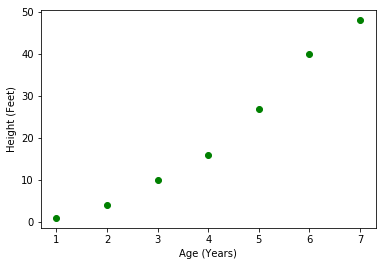

In [5]:
import matplotlib.pyplot as plt

# Where we just assume Y to be height of a tree in feet and X to be age in years

y = [1,4,10,16,27,40,48]
x = [1,2, 3, 4, 5, 6, 7]
fig, ax = plt.subplots()
ax.scatter(x,y, c='green')
ax.set_xlabel("Age (Years)")
ax.set_ylabel("Height (Feet)")
plt.show()


## Basic Extensions of Linear model
I'll specifically discuss polynomial regressions, piece-wise polynomial and then how this naturally leads to splines in this section. 

### Polynomial Regressions
The simple idea behind polynomial regression is to take whatever predictor variables you maybe have, and instead of just including the term itself, add or replace a polynomial version of that term. In the above tree example above, we COULD maintain the simple linear relationship of $\hat{y} = \beta x_{years}$ or we could try instead fitting a function $\hat{y} = \beta x^2_{years}$.

Since, in most real-world applications relationships between variables will not be linear this is a way to try to best accomdate non-linearity relationships. However, the handy part about polynomial regression is that in relation to our new polynomial terms, our model is stil linear. For example, if we had 2 predictor varialbe x and z for y then our polynomial regression model could look like:

$$\hat{y_i} = \beta_0 + b_1(x_{i}) + b_2(x_{i}) + b_3(z_{i}) + b_4(z_{i})$$

Where each $b_i$ is some polynomial of the predictor variable. (i.e $b_1(x_i) = x_i^2$ or could be $b_3(z_i) = z_i^3$)

Therefore, now our new $\hat{y}$ is linear in relation to these new $b_i(x)$ terms, that means we can use all the techniques we discuss with least squares to find the parameter coefficient values for this model, and the statisitical significance tests that specifically apply to linear models (__CHRIS need to come back to this when we deep dive into stat sig tests__) are also applicable with this model. We basically have gained a better fit but can still use the exact same tool set we already are comfortable with  

.
However, what if the data is like this??! (in crazy tree land)


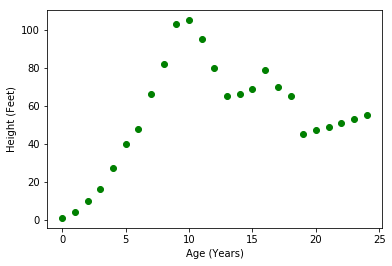

In [10]:
import matplotlib.pyplot as plt

# Where we just assume Y to be height of a tree in feet and X to be age in years

y = [1,4,10,16,27,40,48,66, 82, 103, 105, 95, 80, 65, 66, 69, 79, 70, 65, 45, 47, 49, 51, 53, 55]
x = [i for i in range(25)]
fig, ax = plt.subplots()
ax.scatter(x,y, c='green')
ax.set_xlabel("Age (Years)")
ax.set_ylabel("Height (Feet)")
plt.show()


We could try fitting this with the polynomial regression model, but realize that with this model we have to fit only ONE global polynomial function. Our global polynomial function could have serious limitations as (1) our data could naturally have different 'sections' where it behaves completely differently than other 'sections' of the data - meaning trying to fit one global polynomial would require an overly complicated / high order polynomial that would probably overfit (2) we might go the other direction and end up picking too simple of a model that isn't able to capture the patterns in each invidiual section.  

## Piece-wise Polynomials
Piece-wise functions, and more specifically piece-wise polynomials can help us better model data like the above. We split up the data into 'sections' and fit independent polynomial regressions (like the function we showed above) to best fit within each section. We do this by putting __knots__ into our overall function to make the overall model piecewise. Below is an example of what it could be:

$$
\hat{y_i} = \begin{cases} 
      x_i^2, \space\space\space\space x \leq 10 \\
      x_i^2, \space\space\space\space10 < x \leq 13 \\
      -x_i^2 + c, \space\space\space\space 13 < x \leq 19 \\
      x_i, \space\space\space\space x > 19
   \end{cases}
$$
Each value of x where our model switches to a completely different polynomial function is called a __knot__. Ideally, you want the knots where there is a significant change in the way the data is related to your predictor variables - in our weird tree example we can eyeball these 'x' values and place the knots accordingly. Usually, you don't want to do this (__CHRIS (1) lot of time have way too much data to eyeball, and (2) if looking at the data and then choosing where the knots should be based on the data is that data snooping?__). I'll mention some methods of systemically choosing the number of knows and where to place them later on.


## Splines: Regression and Smoothing splines

__CHRIS - pg.270 - should we got deeper into explaining basis functions?? / understanding the underlying math concept of it. Is a basis function just a basis in that specific function space?__

Definition of continuity:
If a function 'f' is continous everywhere then $\forall$ points a
$$\lim_{x\to a-} f(x) = f(x) \lim_{x\to a^+}  = f(a) $$

__CHRIS what is the g(x) on pg 277? Is it similar to the spline basis representation on pg.273>>__

## ADD a section on cross-validation as a lot of these methods that extend simple linear models leverage cross-validation to pick the best parameter

# Show how they can fail and then introduce splines and how they tend to be better

# Tie Regression stuff into how it's the foundation the current techniques in machine learning. And even how they might differ (i.e. like statistical significance tests for coefficients etc..)

Credit:  (go through and credit whatever resources I found especially useful)

    - Introduction To Statiscal Learning  
    - Khan Academy  
    - https://economictheoryblog.com/2015/02/19/ols_estimator/